In [21]:
import pickle
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [22]:
df = pd.read_csv("CleansedDataSets/WeatherDataTrain.csv")

df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
df = df[["MDM current (A)", "VDV Pos [%] (%)", "IGV Pos [%] (%)", "Isentropic His (J/kg)", "Phi"]]


df.head(10)

,MDM current (A),VDV Pos [%] (%),IGV Pos [%] (%),Isentropic His (J/kg),Phi
timestamp,,,,,
2022-01-01 05:43:16.901,90.130478,80.0,87.0,51446.290212,0.119476
2022-01-01 05:43:47.055,90.290710,80.0,87.0,51522.739218,0.119504
2022-01-01 05:43:47.218,90.290710,80.0,87.0,51524.835754,0.119555
2022-01-01 05:44:17.312,90.267815,80.0,87.0,51773.865724,0.119610
2022-01-01 05:44:17.402,90.267815,80.0,87.0,51781.241612,0.118992
2022-01-01 05:44:47.370,89.764229,80.0,87.0,51464.682076,0.119001
2022-01-01 05:44:47.455,89.764229,80.0,87.0,51463.634818,0.113736
2022-01-01 05:45:17.012,89.764229,80.0,87.0,51464.682076,0.115913
2022-01-01 05:45:47.120,89.935905,80.0,87.0,51476.276202,0.116380


<AxesSubplot:>

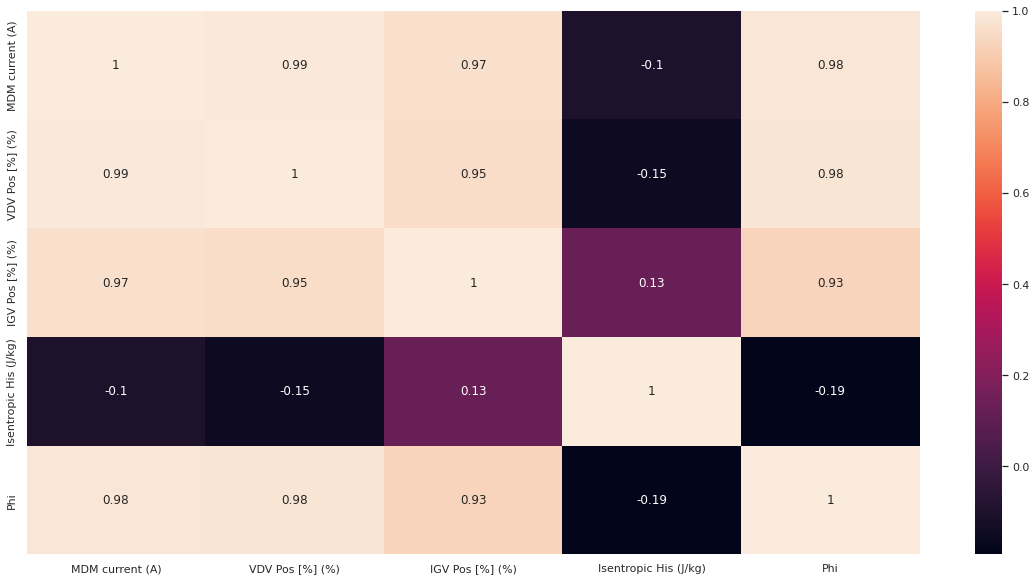

In [23]:
sns.heatmap(df.corr(), annot=True)

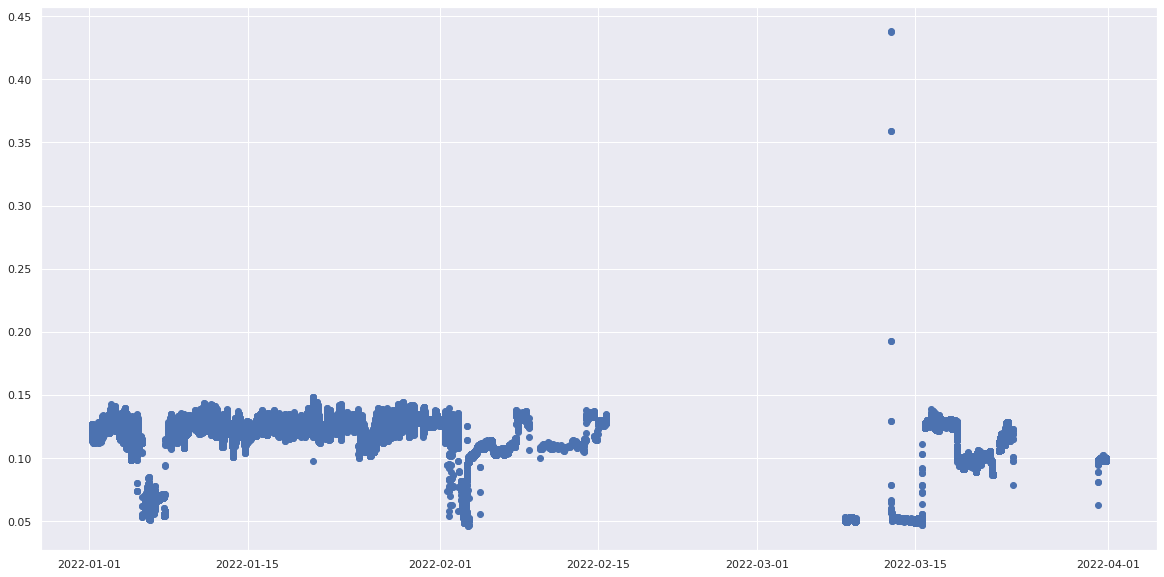

In [24]:
plt.scatter(x=df.index, y=df["Phi"])

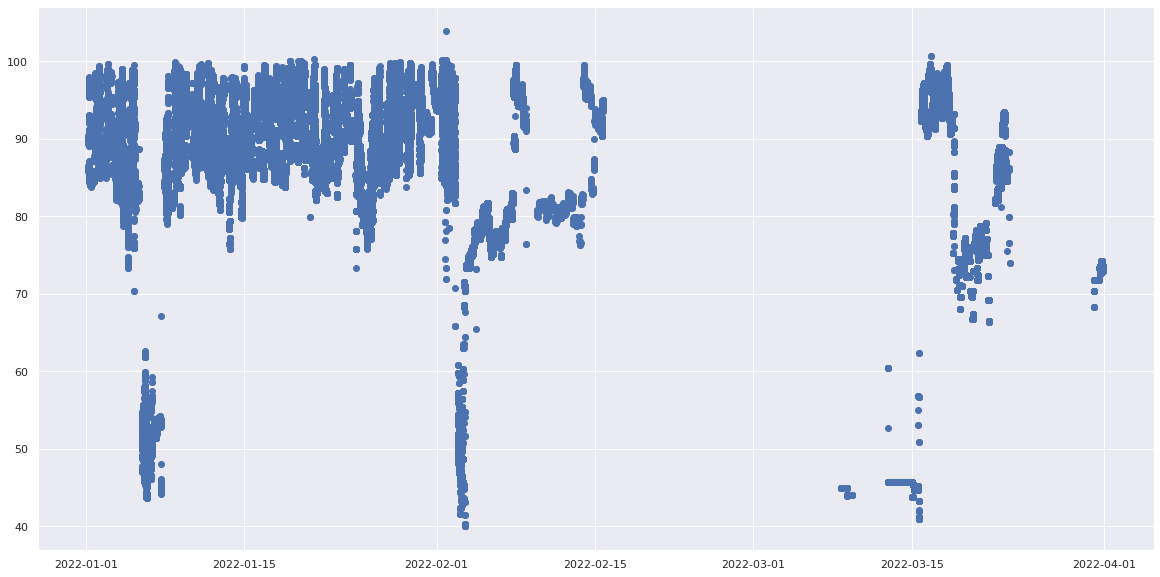

In [25]:
plt.scatter(x=df.index, y=df["MDM current (A)"])

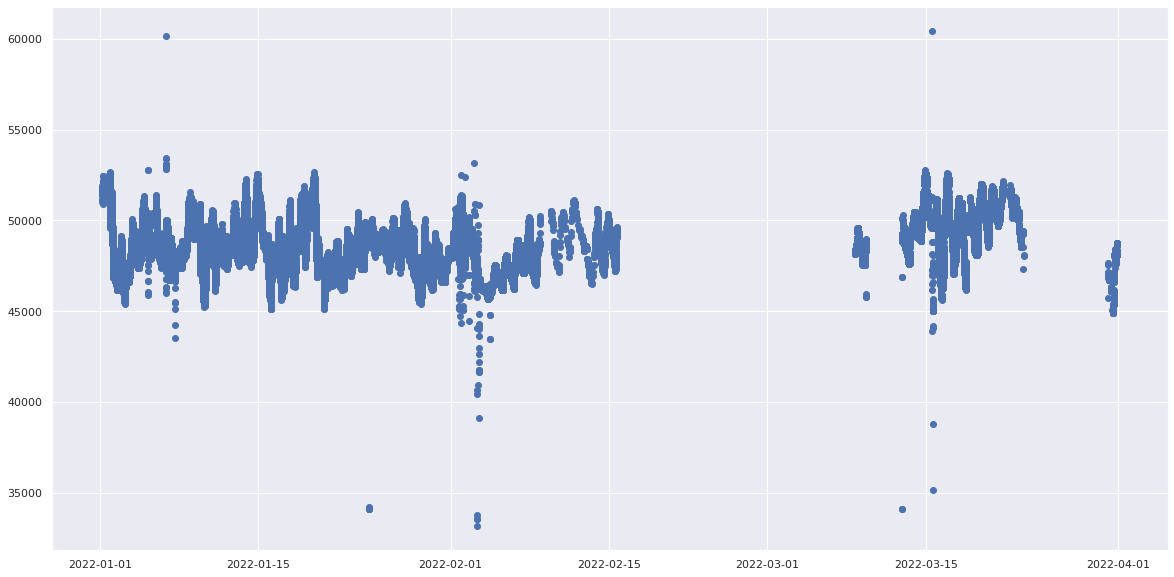

In [26]:
plt.scatter(x=df.index, y=df["Isentropic His (J/kg)"])

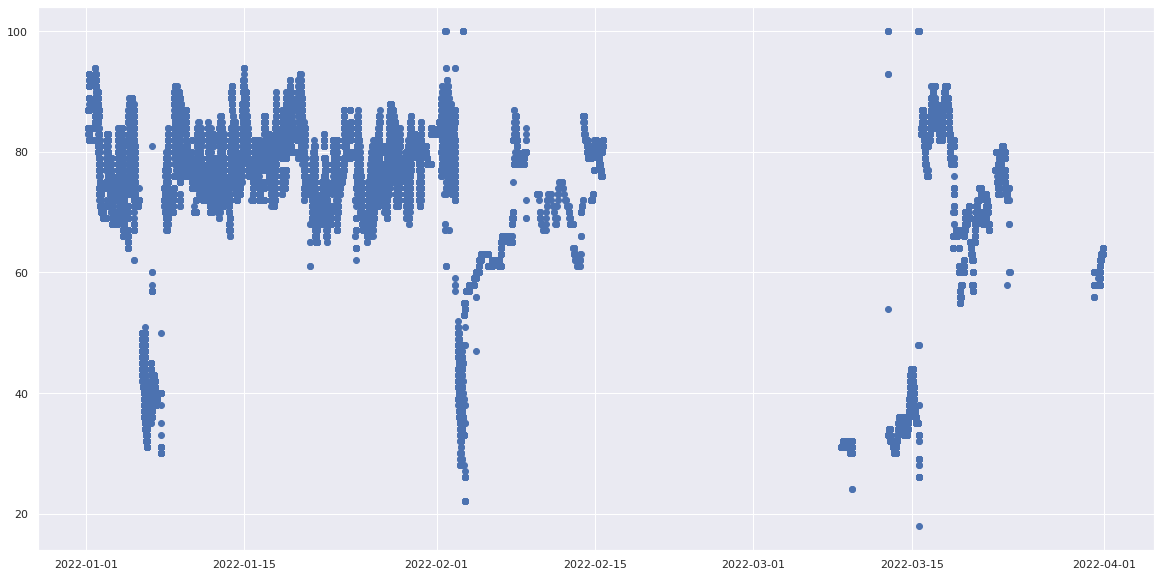

In [27]:
plt.scatter(x=df.index, y=df["IGV Pos [%] (%)"])

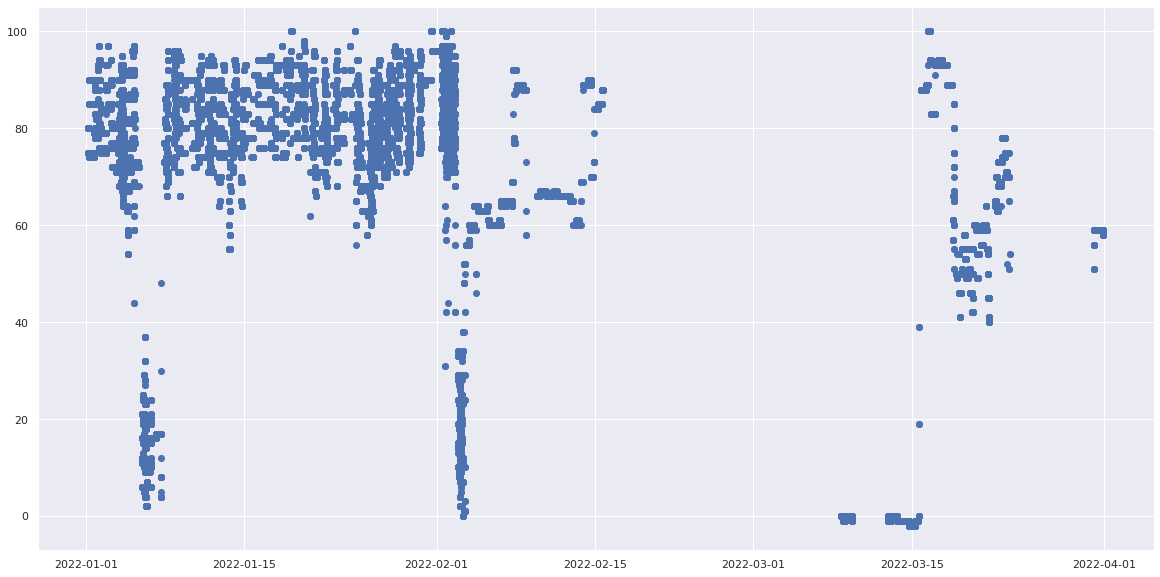

In [28]:
plt.scatter(x=df.index, y=df["VDV Pos [%] (%)"])

In [29]:
subset1 = df.loc[df.index < "2022-02-01"]
subset = df.loc[df.index > "2022-02-02"]

<AxesSubplot:>

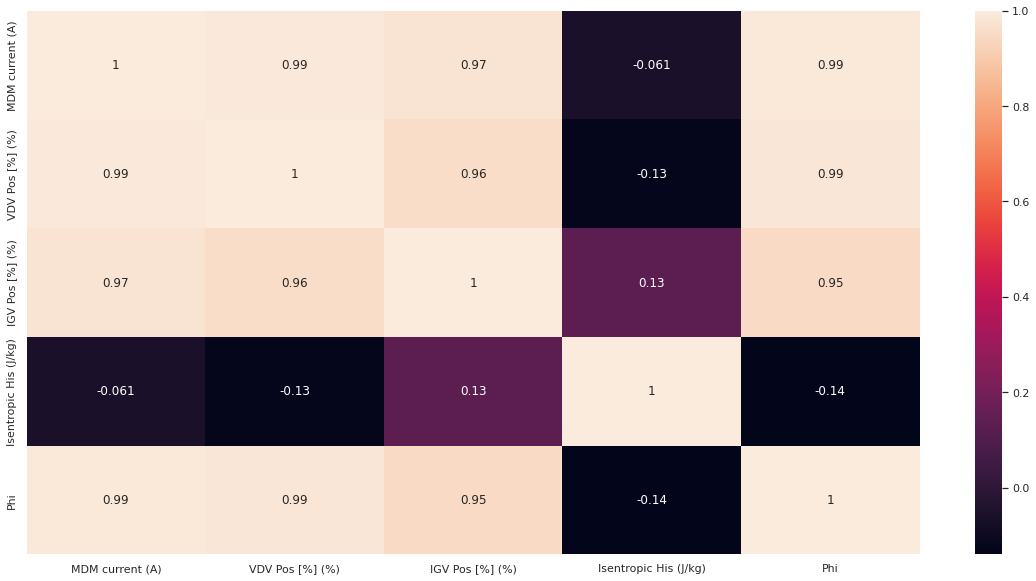

In [30]:
sns.heatmap(subset.corr(), annot=True)

<AxesSubplot:>

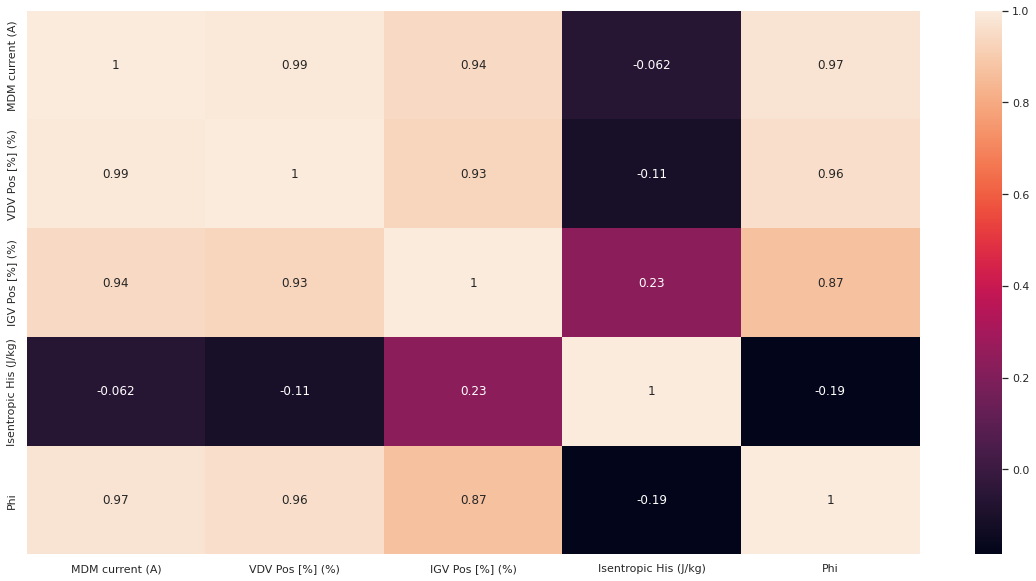

In [31]:
sns.heatmap(subset1.corr(), annot=True)

In [48]:
subset1 = subset1.loc[subset1["MDM current (A)"]>80]
subset1 = subset1.loc[subset1["Phi"]>0.11]
# subset1 = subset1.loc[subset1["Phi"]<0.135]
subset1 = subset1.loc[subset1["Isentropic His (J/kg)"]>45000]

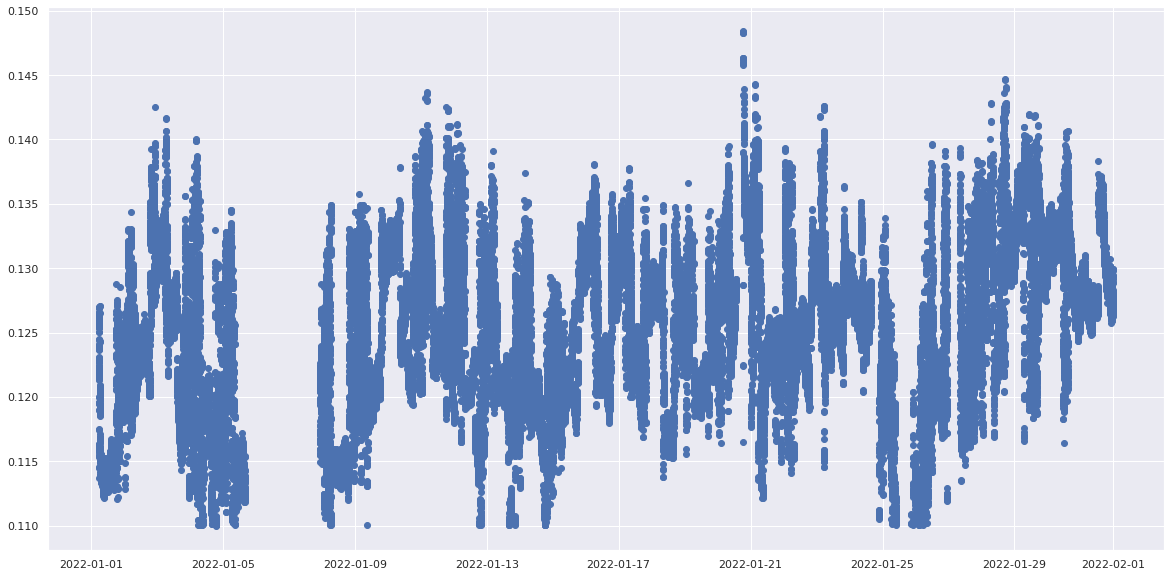

In [49]:
plt.scatter(x=subset1.index, y=subset1["Phi"])

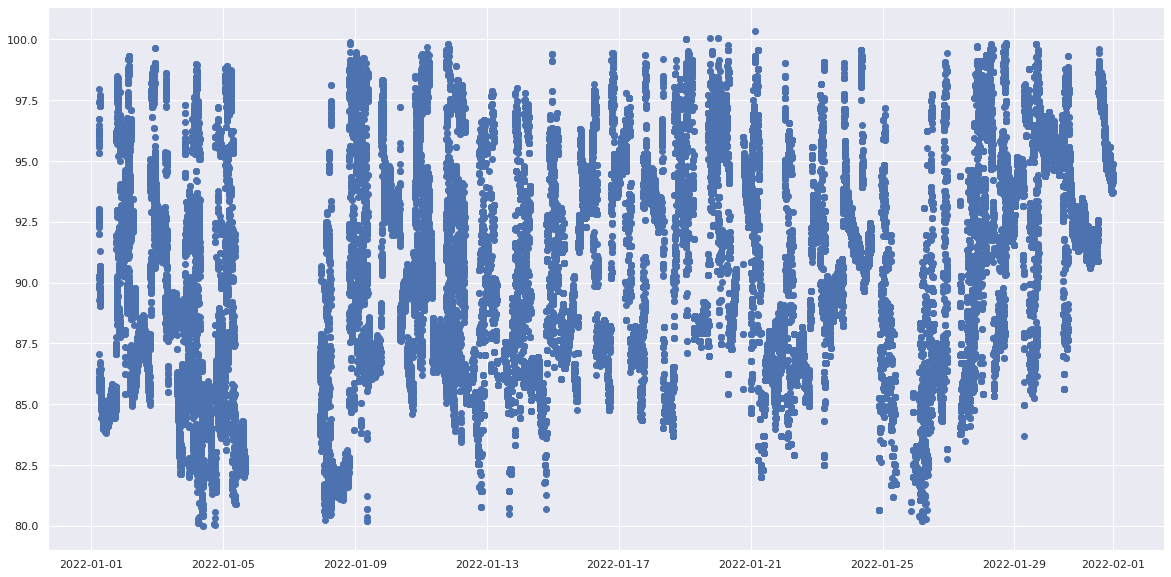

In [50]:
plt.scatter(x=subset1.index, y=subset1["MDM current (A)"])

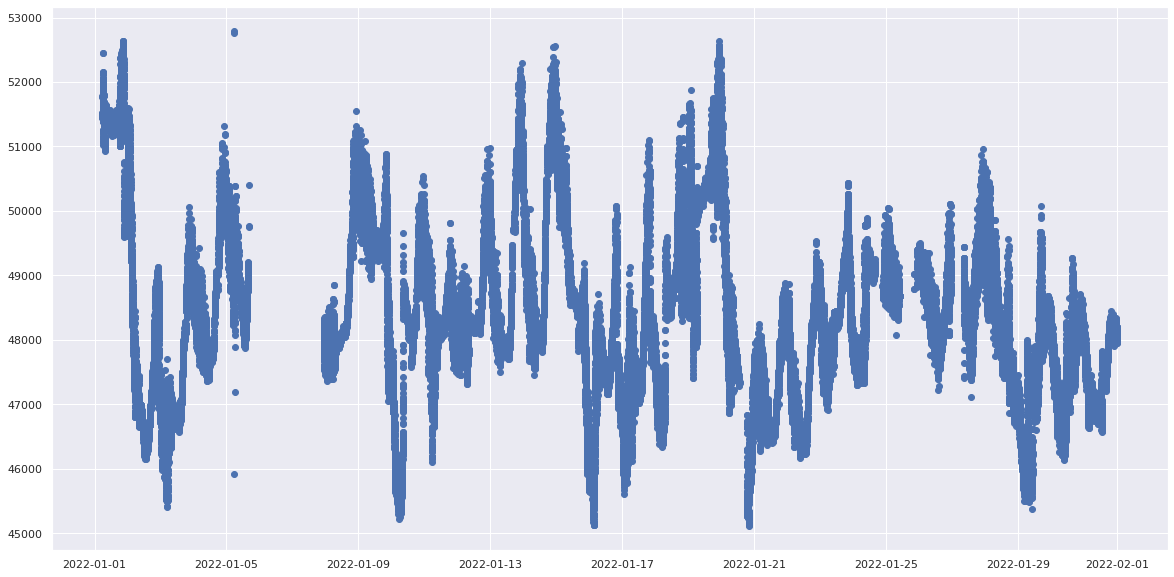

In [51]:
plt.scatter(x=subset1.index, y=subset1["Isentropic His (J/kg)"])

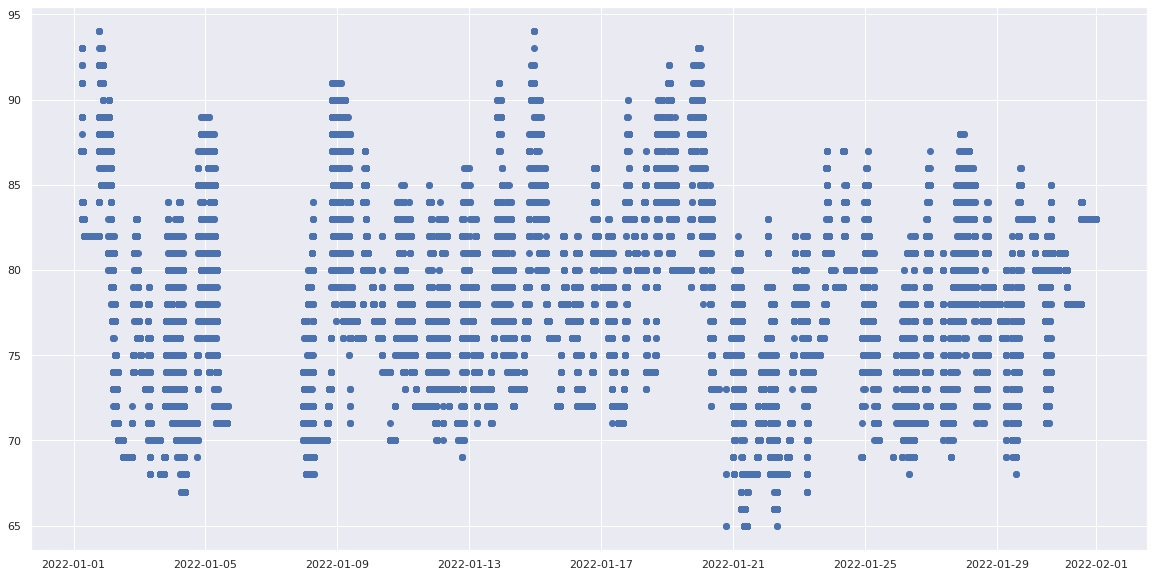

In [52]:
plt.scatter(x=subset1.index, y=subset1["IGV Pos [%] (%)"])

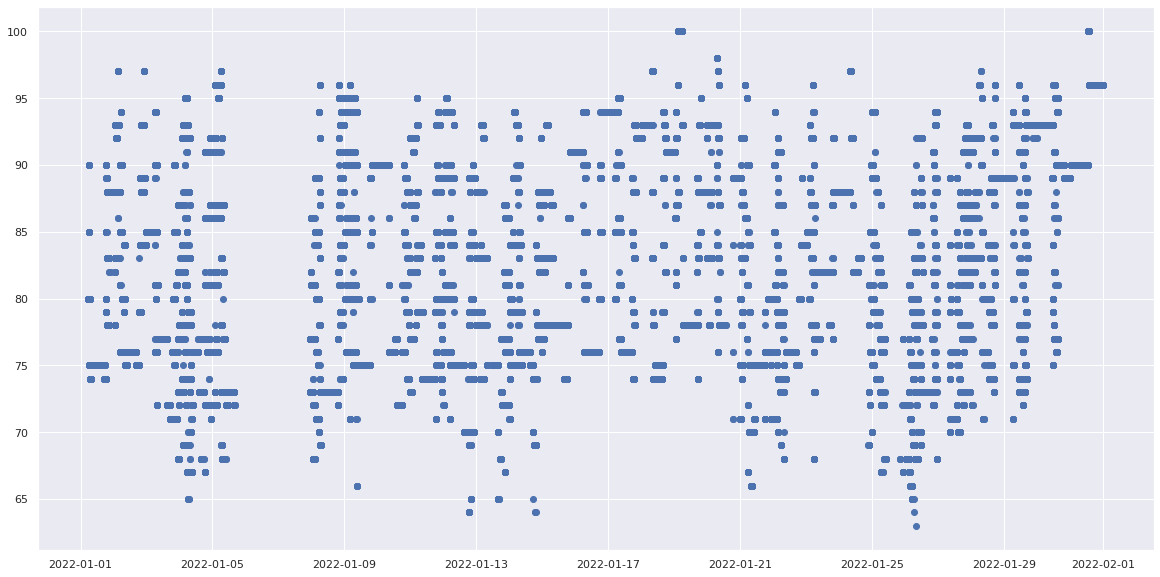

In [53]:
plt.scatter(x=subset1.index, y=subset1["VDV Pos [%] (%)"])

<AxesSubplot:>

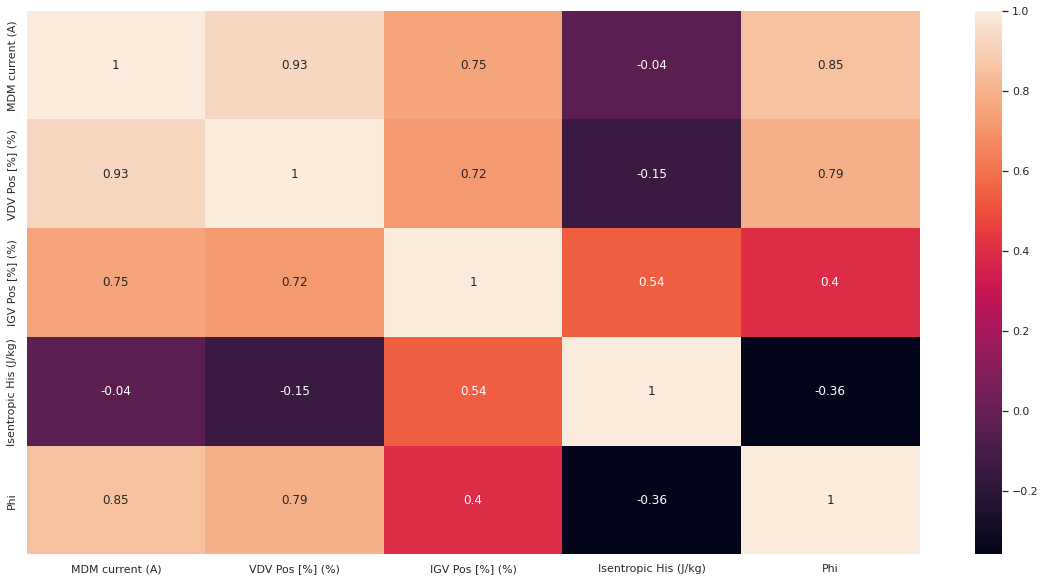

In [54]:
sns.heatmap(subset1.corr(), annot=True)

In [55]:
subset1.to_csv("Kmeans/DataSets/janmanuallycleansed.csv")